In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [146]:
df = pd.read_csv('diabetes.csv')

### Khai phá dữ liệu

In [147]:
df.shape

(768, 9)

In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
col_names = df.keys()

col_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Bởi bài toán dự đoán bệnh nhân có mắc bệnh tiểu đường hay không sẽ trả về đáp án là có hoặc không, do vậy đây sẽ là bài toán phân loại


### Bên cạnh đó, cột giá trị cần dự đoán chính là " OutCome", do vậy, dữ liệu dự đoán là outcome, có đặc điểm là trả về giá trị 0 hoặc 1, tức false hoặc true


In [150]:
# tạo df mới sẽ ko chứa cột outcome
df_drop_outcome = df.drop(['Outcome'], axis= 1)
df_drop_outcome.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [151]:
df_drop_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [152]:
# kiểm tra xem có bị thiếu ko
missing_values = df_drop_outcome.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [153]:
df_drop_outcome.describe( include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Phân tích đơn biến

Kiểm tra về giá trị trong " outcome"

In [154]:
# day la gia tri du bao
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [155]:
# check khuyet
df['Outcome'].isnull().sum()

0

In [156]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

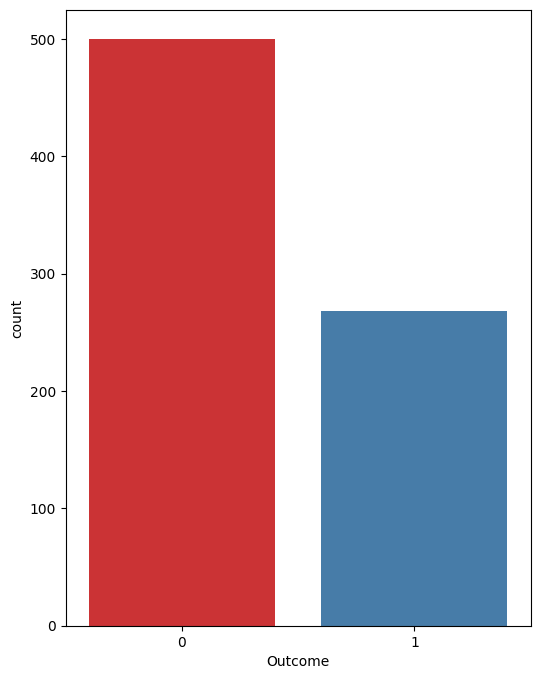

'\nx: Tham số này xác định biến phân loại (categorical variable) mà bạn muốn phân tích và hiển thị số lượng quan sát của nó. Biểu đồ sẽ hiển thị số lượng quan sát cho từng giá trị của biến này trên trục x.\n\ndata: Tham số này là dữ liệu (data frame) chứa biến phân loại và thông tin cần phân tích.\n'

In [157]:
#xem phan phoi tan suat cua gia tri
df['Outcome'].value_counts()/len(df)

f, ax = plt.subplots(figsize=(6, 8))
## Requirement 7:
## PUT YOUR CODE HERE:
ax = sns.countplot(x='Outcome', data=df, palette="Set1")
plt.show()
"""
x: Tham số này xác định biến phân loại (categorical variable) mà bạn muốn phân tích và hiển thị số lượng quan sát của nó. Biểu đồ sẽ hiển thị số lượng quan sát cho từng giá trị của biến này trên trục x.

data: Tham số này là dữ liệu (data frame) chứa biến phân loại và thông tin cần phân tích.
"""


In [158]:
df['Outcome'].value_counts()/len(df)

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

In [159]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Kết quả của phân tích đơn biến**

- Số lượng nhãn trong biến Outcome là 2.

- Hai giá trị nhãn là '0' và '1'.

- Trong tổng số giá trị của Outcome, 0 xuất hiện 65,1%  và 1 xuất hiện 34,9% .

- Biểu đồ đơn biến xác nhận những phát hiện của chúng ta rằng

    - 0 có 500 giá trị và

    - 1 có 268 giá trị.

# Phân tích song biến

- Ta sẽ phân tích dựa trên df_drop_outcome.<br>
- Dựa vào phần trên, ta có thể thấy dữ liệu đều ở dạng number, nhưng có thể kiểm tra lại theo cách sau

In [160]:
numerical = [var for var in df_drop_outcome.columns if df[var].dtype!='O']

print('Có {} biến giá trị số\n'.format(len(numerical)))

print('Các biến giá trị số đó là :', numerical)

Có 8 biến giá trị số

Các biến giá trị số đó là : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Kiểm tra dữ liệu ngoại lai

In [161]:
for var in numerical:
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25) #IQR = Q3-Q1
    Lower_fence = df[var].quantile(0.25) - (IQR * 3)
    Upper_fence = df[var].quantile(0.75) + (IQR * 3)
    print('Dữ liệu ngoại lai của biến', var, 'là các giá trị < {lowerboundary} hoặc > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Dữ liệu ngoại lai của biến Pregnancies là các giá trị < -14.0 hoặc > 21.0
Dữ liệu ngoại lai của biến Glucose là các giá trị < -24.75 hoặc > 264.0
Dữ liệu ngoại lai của biến BloodPressure là các giá trị < 8.0 hoặc > 134.0
Dữ liệu ngoại lai của biến SkinThickness là các giá trị < -96.0 hoặc > 128.0
Dữ liệu ngoại lai của biến Insulin là các giá trị < -381.75 hoặc > 509.0
Dữ liệu ngoại lai của biến BMI là các giá trị < -0.6000000000000014 hoặc > 64.5
Dữ liệu ngoại lai của biến DiabetesPedigreeFunction là các giá trị < -0.9037499999999999 hoặc > 1.77375
Dữ liệu ngoại lai của biến Age là các giá trị < -27.0 hoặc > 92.0


Vẽ bản đồ heatmap của ma trận tương quan

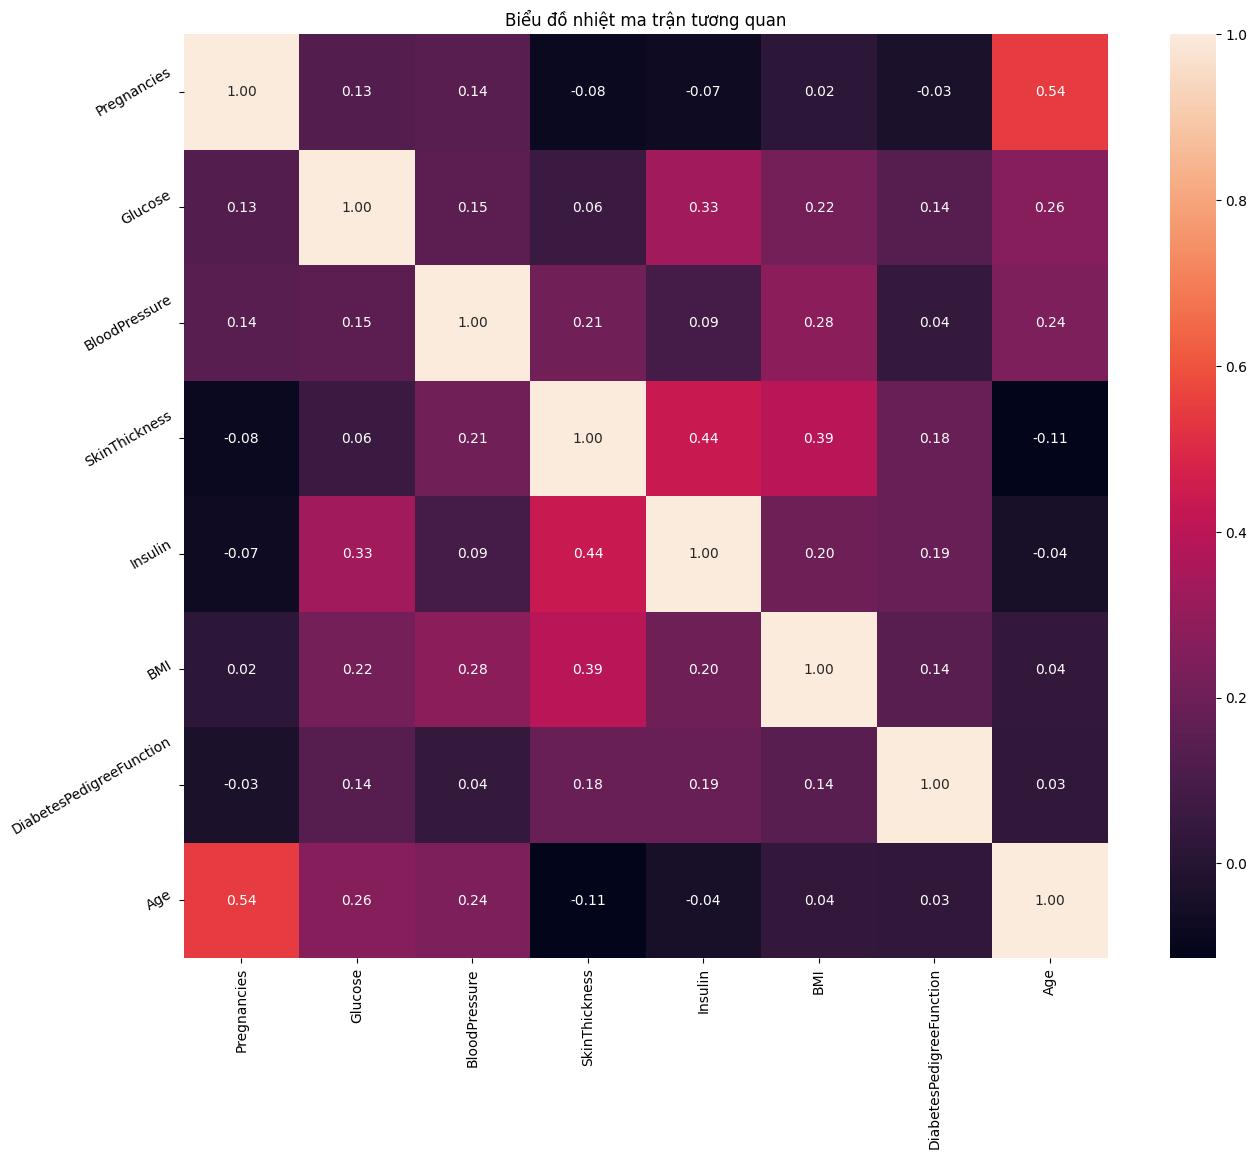

In [162]:
correlation = df[numerical].corr()
plt.figure(figsize=(16,12))
plt.title('Biểu đồ nhiệt ma trận tương quan')
## Requirement 16:
## PUT YOUR CODE HERE:
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

# Tiền Xử lý dữ liệu

Ta sẽ tiến hành sử dụng 2 bộ dữ liệu bào gồm: <br>
- train: là data xóa cột outcome
- dự báo: là cột income

In [163]:
X = df_drop_outcome
y = df['Outcome']

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
# chia tập dữ liệu 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [165]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [193]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [194]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [166]:
# Sử dụng lựa chọn đặc trưng bằng Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Tạo một Random Forest Classifier
rf_classifier = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(X_train,y_train)


SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [167]:
selected_feat_random = X_train.columns[(rf_classifier.get_support())]
selected_feat_random

Index(['Glucose', 'BMI', 'Age'], dtype='object')

# Câu 2

In [181]:
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,roc_curve, auc
import matplotlib.pyplot as plt

In [182]:
def result_by_rf(model, X_train, X_test, y_train, y_test, selected_feat_random):
    model.fit(X_train[selected_feat_random], y_train)
    
    print()
    print('Random forest selected features')
    
    print('='*40)

    print('Train:')
    y_pred = model.predict(X_train[selected_feat_random])
    print('Accuracy:', accuracy_score(y_train, y_pred))
    print('Precision:', precision_score(y_train, y_pred))
    print('Recall:', recall_score(y_train, y_pred))
    print('F1 score:', f1_score(y_train, y_pred))
    print('Validation:')
    y_pred = model.predict(X_test[selected_feat_random])
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    # Vẽ biểu đồ ROC và tính AUC-ROC
    y_prob_test = model.predict_proba(X_test[selected_feat_random])[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Tính diện tích dưới đường cong ROC (AUC-ROC)
    roc_auc = auc(fpr, tpr)
    print('AUC-ROC Score:', roc_auc)

    # Kiểm tra điều kiện AUC-ROC > 0.8
    if roc_auc > 0.8:
        print('Mô hình có khả năng phân loại tốt (AUC-ROC > 0.8)')
    else:
        print('Mô hình cần được cải thiện (AUC-ROC <= 0.8)')


Random forest selected features
Train:
Accuracy: 0.7719869706840391
Precision: 0.7134502923976608
Recall: 0.5727699530516432
F1 score: 0.6354166666666666
Validation:
Accuracy: 0.7467532467532467
Precision: 0.6481481481481481
Recall: 0.6363636363636364
F1 score: 0.6422018348623852


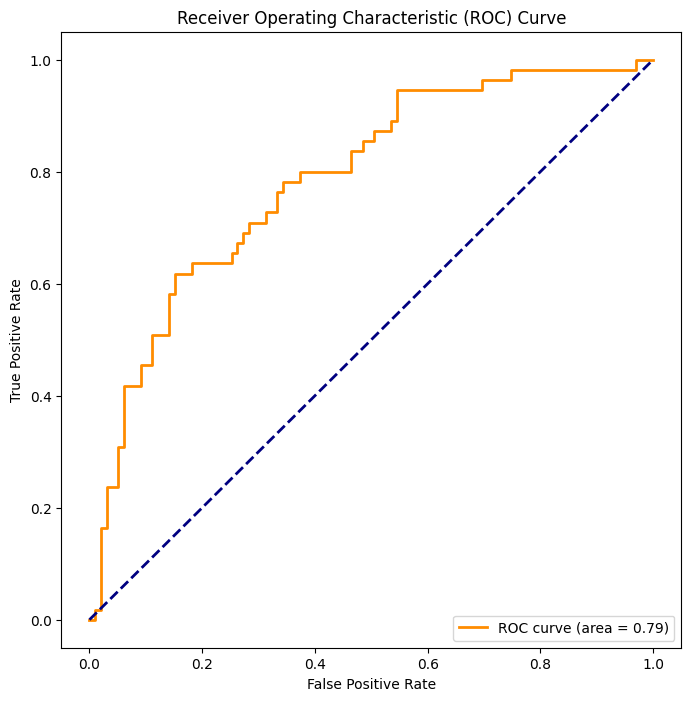

AUC-ROC Score: 0.78732782369146
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


In [184]:
model = LogisticRegression()
result_by_rf(model,X_train,X_test,y_train,y_test,selected_feat_random)


Random forest selected features
Train:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Validation:
Accuracy: 0.6623376623376623
Precision: 0.5230769230769231
Recall: 0.6181818181818182
F1 score: 0.5666666666666668


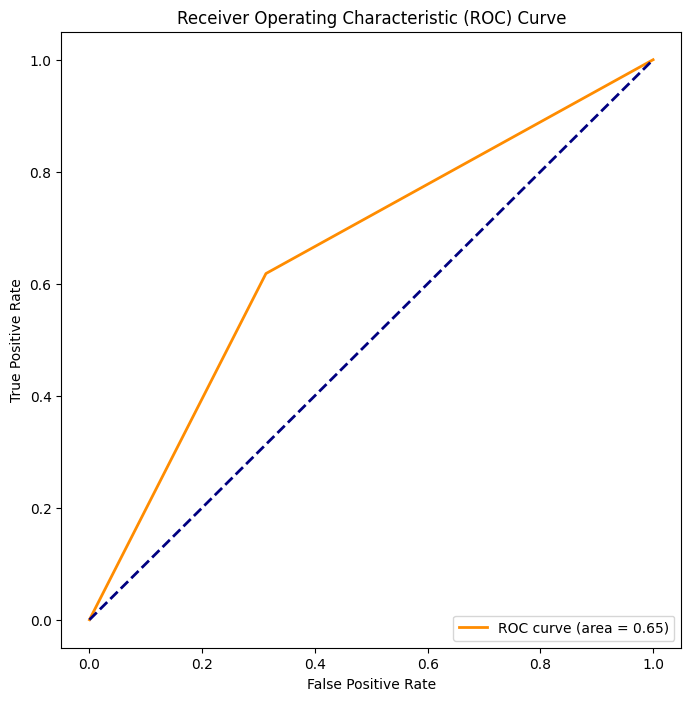

AUC-ROC Score: 0.6525252525252525
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


In [185]:
model = tree.DecisionTreeClassifier()
result_by_rf(model,X_train,X_test,y_train,y_test,selected_feat_random)


Random forest selected features
Train:
Accuracy: 0.7964169381107492
Precision: 0.7417582417582418
Recall: 0.6338028169014085
F1 score: 0.6835443037974683
Validation:
Accuracy: 0.7207792207792207
Precision: 0.6153846153846154
Recall: 0.5818181818181818
F1 score: 0.5981308411214953


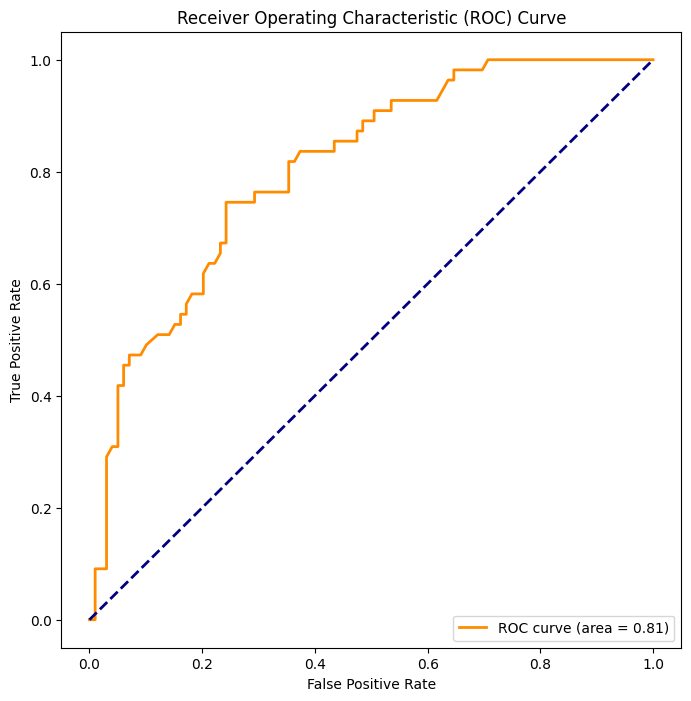

AUC-ROC Score: 0.8077134986225896
Mô hình có khả năng phân loại tốt (AUC-ROC > 0.8)


In [186]:
model = AdaBoostClassifier()
result_by_rf(model,X_train,X_test,y_train,y_test,selected_feat_random)


Random forest selected features
Train:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Validation:
Accuracy: 0.7337662337662337
Precision: 0.6206896551724138
Recall: 0.6545454545454545
F1 score: 0.6371681415929203


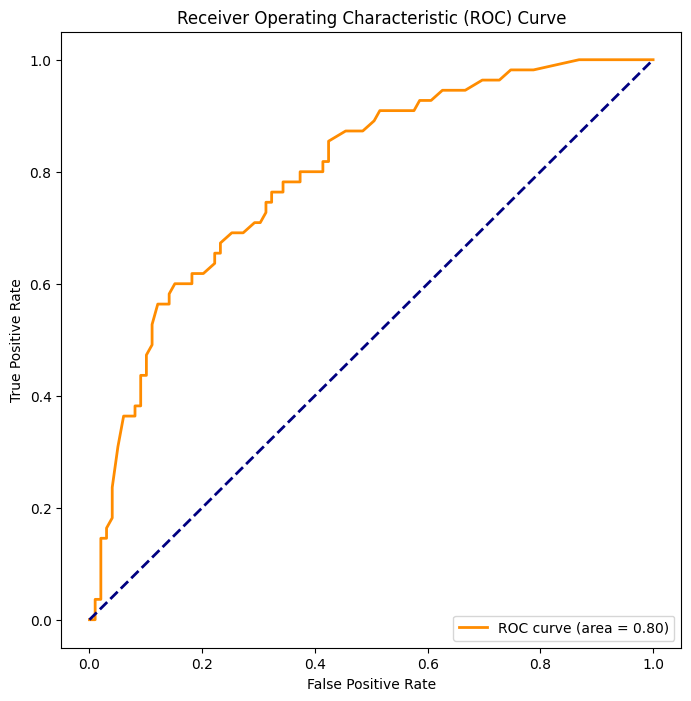

AUC-ROC Score: 0.7951331496786042
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


In [183]:
model = RandomForestClassifier()
result_by_rf(model,X_train,X_test,y_train,y_test,selected_feat_random)


Random forest selected features
Train:
Accuracy: 0.6579804560260586
Precision: 0.7142857142857143
Recall: 0.023474178403755867
F1 score: 0.045454545454545456
Validation:
Accuracy: 0.6428571428571429
Precision: 0.0
Recall: 0.0
F1 score: 0.0


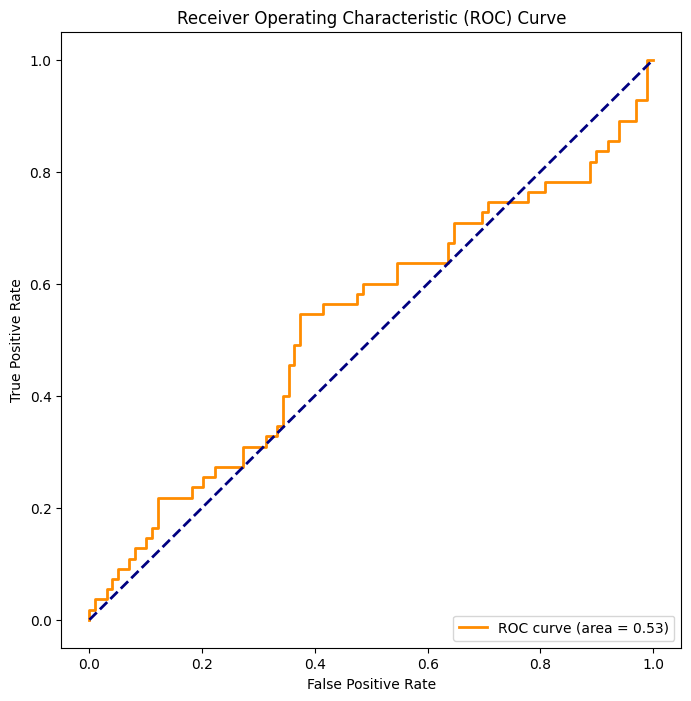

AUC-ROC Score: 0.5274563820018365
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


In [187]:
## PUT YOUR CODE HERE:
model = MLPClassifier(hidden_layer_sizes=(100, 50, ), max_iter=30)
result_by_rf(model,X_train,X_test,y_train,y_test,selected_feat_random)


## <font color = 'red'>Chọn cái model = AdaBoostClassifier()<font>

# Câu 4:

Do ở phần trên, ta dùng lựa chọn tính năng mà ko chuẩn hóa , vậy bây giờ sẽ chuẩn hóa mà ko lựa chọn tính năng xem sao

In [195]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [196]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [199]:
# Chuẩn hóa dữ liệu
scaler = Normalizer()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.transform(X_test)

In [201]:
def result_by_rf_no_select(model, X_train, X_test, y_train, y_test, selected_feat_random):
    model.fit(X_train, y_train)
    
    print()
    print('Random forest selected features')
    
    print('='*40)

    print('Train:')
    y_pred = model.predict(X_train)
    print('Accuracy:', accuracy_score(y_train, y_pred))
    print('Precision:', precision_score(y_train, y_pred))
    print('Recall:', recall_score(y_train, y_pred))
    print('F1 score:', f1_score(y_train, y_pred))
    print('Validation:')
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    # Vẽ biểu đồ ROC và tính AUC-ROC
    y_prob_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Tính diện tích dưới đường cong ROC (AUC-ROC)
    roc_auc = auc(fpr, tpr)
    print('AUC-ROC Score:', roc_auc)

    # Kiểm tra điều kiện AUC-ROC > 0.8
    if roc_auc > 0.8:
        print('Mô hình có khả năng phân loại tốt (AUC-ROC > 0.8)')
    else:
        print('Mô hình cần được cải thiện (AUC-ROC <= 0.8)')


Random forest selected features
Train:
Accuracy: 0.7736156351791531
Precision: 0.7228915662650602
Recall: 0.5633802816901409
F1 score: 0.633245382585752
Validation:
Accuracy: 0.7077922077922078
Precision: 0.6136363636363636
Recall: 0.4909090909090909
F1 score: 0.5454545454545455


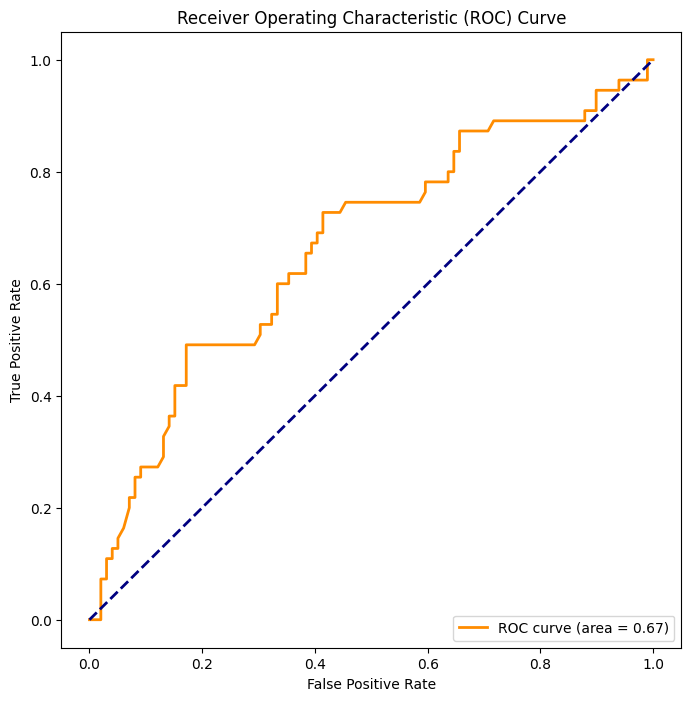

AUC-ROC Score: 0.6652892561983471
Mô hình cần được cải thiện (AUC-ROC <= 0.8)


In [202]:
model = AdaBoostClassifier()
result_by_rf_no_select(model,X_train_nor,X_test_nor,y_train,y_test,selected_feat_random)

# Câu 5

Dữ liệu kiểm tra qua thì đều ko bị thiếu và đều ở dạng số

Thử xong thấy hiệu xuất thấp đi nên sẽ chọn phương pháp feature selection

Tóm lại, ta sẽ sử dụng feature selection bằng phương pháp random forest, sau đó chọn mô hình AdaBoostClassifier để xử lý

Ứng dụng thực tế cũng khá sát bởi AUC-ROC cáo, trên 0.8

# Câu 6

In [204]:
import pickle
# Tải mô hình từ file
model = AdaBoostClassifier()
model.fit(X_train[selected_feat_random], y_train)
# Lưu mô hình vào file
with open('adaboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [206]:
X_train[selected_feat_random].head()

,Glucose,BMI,Age
60,84,0.0,21
618,112,28.2,50
346,139,28.7,22
294,161,21.9,65
231,134,46.2,46


In [207]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
